## Day 13

https://adventofcode.com/2021/day/13

In [1]:
def readInput13(filename):
    with open(filename) as f:
        p = f.read().split("\n\n")
        dots = [ tuple([ int(n) for n in l.split(",") ]) for l in p[0].split("\n") ]
        folds = [ tuple([ 0 if i=="y" else 1 if i=='x' else int(i) for i in i.replace("fold along ","").split("=") ]) for i in p[1].strip("\n").split("\n") ]
        return dots, folds
        
dots0, folds0 = readInput13("data/day13test1.txt")
dots, folds = readInput13("data/input13.txt")

In [2]:
import numpy as np

def fillGrid(dots):
    X = [ x for x,y in dots ]
    Y = [ y for x,y in dots ]
    xmax = max(X)
    ymax = max(Y)
    grid = np.zeros((ymax+1,xmax+1),dtype=int)
    for x,y in dots:
        grid[y][x] = 1
    return grid

grid0 = fillGrid(dots0)
grid  = fillGrid(dots)
grid0

array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [3]:
def normalizeGrid(grid):
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            if grid[y][x]>0: grid[y][x]=1

def foldH(grid,y):
    top = grid[:y,]
    bottom = grid[y+1:,]
    return top+np.flipud(bottom)

def foldV(grid,x):
    left = grid[:,:x]
    right = grid[:,x+1:]
    return left + np.fliplr(right)

In [4]:
fold0_1 = foldH(grid0,7)
normalizeGrid(fold0_1)
print(sum(fold0_1[fold0_1>0]))

fold0_2 = foldV(fold0_1,5)
normalizeGrid(fold0_2)
fold0_2

17


array([[1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

### Part 1

In [5]:
d,f = folds[0]
if f==0:
    fold1 = foldH(grid,f)
else:
    fold1 = foldV(grid,f)    
normalizeGrid(fold1)
print("Part 1:",sum(fold1[fold1>0]))

Part 1: 689


### Part 2

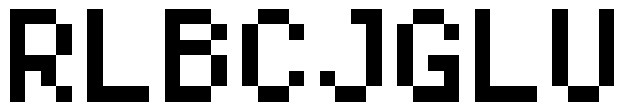

In [6]:
import matplotlib.pyplot as plt

fold = fillGrid(dots)
for d,f in folds:
    if d==0:
        fold = foldH(fold,f)
    else:
        fold = foldV(fold,f)
normalizeGrid(fold)

fig = plt.figure(figsize=(8,4),dpi=100)
f = plt.imshow(fold,cmap='binary') # RLBCJGLU
plt.axis('off')
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)
plt.savefig('./visualisation/day13.png')

Part 2: RLBCJGLU



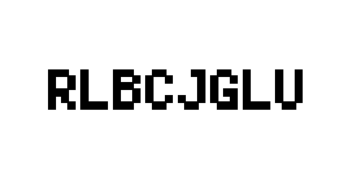

In [13]:
# inspired from https://nanonets.com/blog/ocr-with-tesseract/
import cv2 
import pytesseract

img = cv2.imread('visualisation/day13.png')

# pre-process image with cv2.erode() to smooth/merge pixel transitions
kernel = np.ones((5,5),np.uint8)
img = cv2.erode(img, kernel, iterations=1)
plt.axis('off')
plt.imshow(img)

# OCR
custom_config = r'--oem 3--psm 6'
ocr = pytesseract.image_to_string(img, config=custom_config)
print("Part 2:",ocr)